In [1]:
import pickle
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from parameters import setParams
from main import Replay_Sim
from analysis_class import Sim_Data

## Define models to anaylse

In [2]:
# list with## Extract data for each maze different replay strategies (models)
models = ['EVB', 'gain_only', 'need_only', 'dyna', 'no_replay', 'prioritized_sweeping']

## Extract data for each maze

In [4]:
Mattar = Sim_Data('mattar', models)
Mattar_Open = Sim_Data('mattar_open', models)
Mattar_Constrained = Sim_Data('mattar_constrained', models)
maze_data_list = [Mattar, Mattar_Open, Mattar_Constrained]
# Large_Open = Sim_Data('large_open', models)## Steps to goal
# maze_data_list = [Mattar, Mattar_Open, Mattar_Constrained, Large_Open]

## Function to plot all mazes

In [5]:
def plot_mazes(maze_data_list, dependent_var, y_label, title, plot_logs, crop_y):
    log_vals_bools = [False]
    if plot_logs:
        log_vals_bools.append(True)
    for bool_val in log_vals_bools:
        for maze in maze_data_list:
            maze.plot_fig(dependent_var, y_label=y_label, title=title, log_values=bool_val, crop_y=crop_y)

## Steps to goal

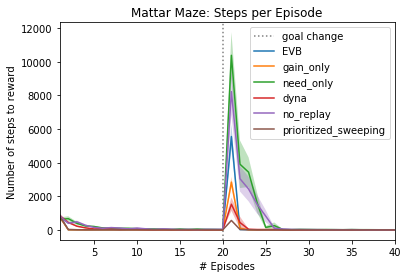

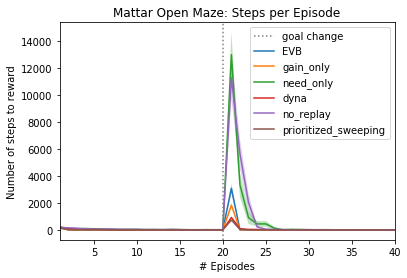

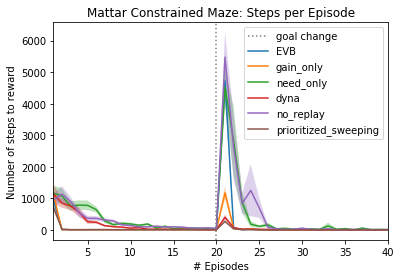

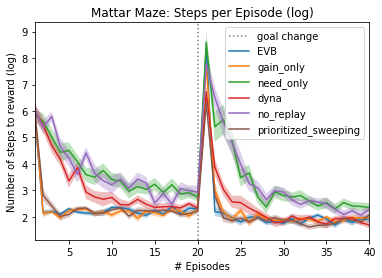

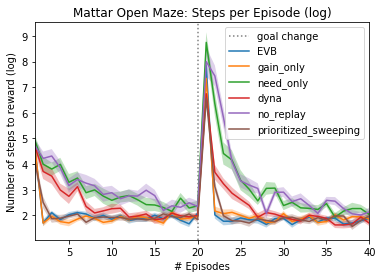

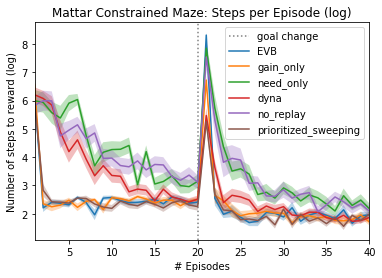

In [6]:
dependent_var = 'steps_per_episode'
y_label = 'Number of steps to reward'
title = 'Steps per Episode'
plot_logs = True
crop_y = False
plot_mazes(maze_data_list, dependent_var, y_label, title, plot_logs, crop_y)

Index(['EVB', 'gain_only', 'need_only', 'dyna', 'prioritized_sweeping'], dtype='object')
Means:
 EVB                      56.333333
gain_only                14.833333
need_only               338.250000
dyna                     13.103448
prioritized_sweeping      4.766667
dtype: float64
Medians:
 EVB                      25.5
gain_only                14.5
need_only               299.0
dyna                      8.0
prioritized_sweeping      3.5
dtype: float64
STDs:
 EVB                      75.338012
gain_only                 9.913708
need_only               235.755150
dyna                     14.418106
prioritized_sweeping      3.747950
dtype: float64
SEMs:
 EVB                     13.754776
gain_only                1.809987
need_only               43.042805
dyna                     2.632374
prioritized_sweeping     0.684279
dtype: float64
[0 1 2 3 4]


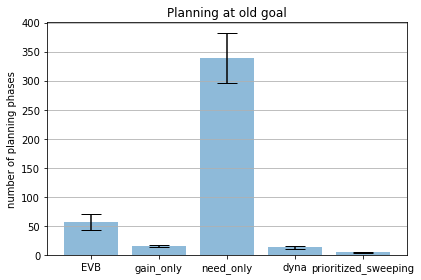

In [8]:
import pandas as pd
df_n_plan_at_goal_change = pd.DataFrame(np.nan, index=np.arange(len(Mattar.model_data['EVB'])), columns=Mattar.model_data.keys())
for model in Mattar.model_data:
    for sim in Mattar.model_data[model]:
        df_n_plan_at_goal_change[model][sim] = np.array(Mattar.model_data[model][sim].performance_df['n_plan_phases_g1'][20])
#         print(np.array(Mattar.model_data[model][sim].performance_df['n_plan_phases_g1'][20]))
# print(df_n_plan_at_goal_change['need_only'])
df_n_plan_at_goal_change = df_n_plan_at_goal_change.drop('no_replay', axis=1)
print(df_n_plan_at_goal_change.keys())

means = df_n_plan_at_goal_change.mean()
medians = df_n_plan_at_goal_change.median()
STDs = df_n_plan_at_goal_change.std()
SEMs = STDs/np.sqrt(len(Mattar.model_data[model]))
x_pos = np.arange(len(df_n_plan_at_goal_change.keys()))
print("Means:\n", means)
print("Medians:\n", medians)
print("STDs:\n", STDs)
print("SEMs:\n", SEMs)

# plot
fig, ax = plt.subplots()
print(x_pos)
ax.bar(x_pos, means, yerr=SEMs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('number of planning phases')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_n_plan_at_goal_change.keys())
ax.set_title('Planning at old goal')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

## Total time per episode

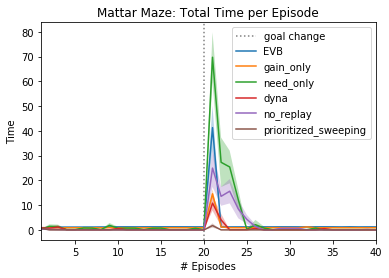

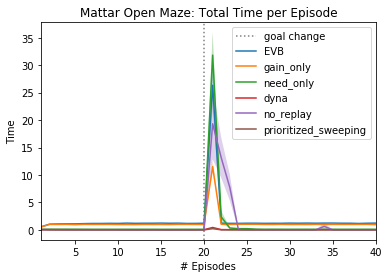

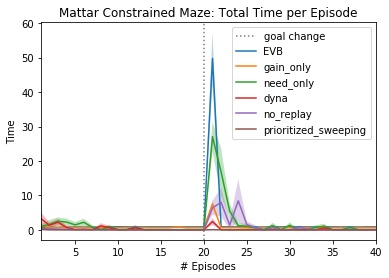

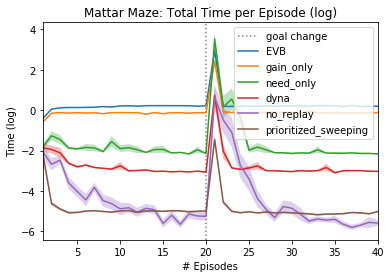

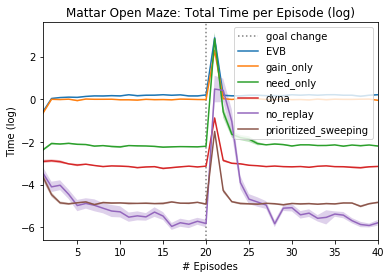

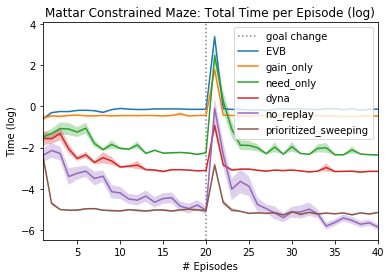

In [9]:
dependent_var = 'full_time_per_episode'
y_label = 'Time'
title = 'Total Time per Episode'
plot_log = True
crop_y = False
plot_mazes(maze_data_list, dependent_var, y_label, title, plot_log, crop_y)

## Planning time per episode

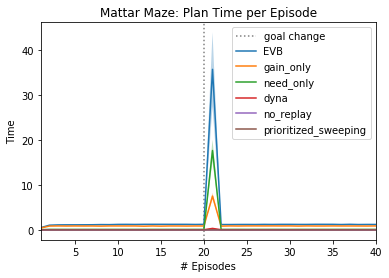

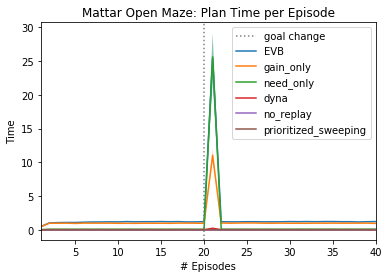

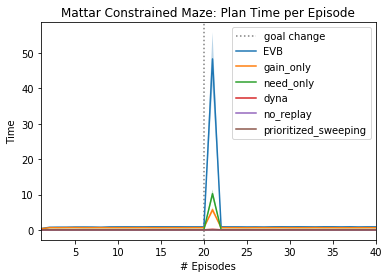

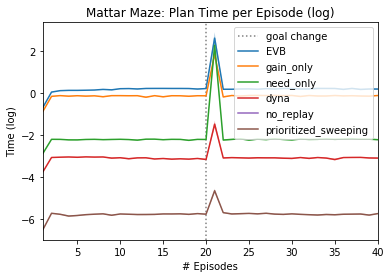

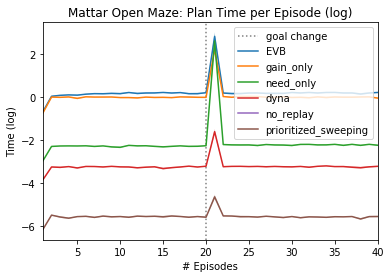

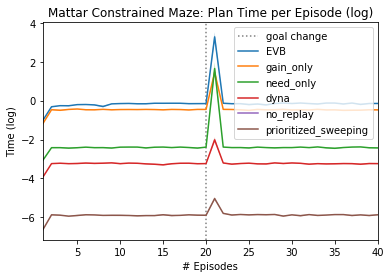

In [10]:
dependent_var = 'plan_times'
y_label = 'Time'
title = 'Plan Time per Episode'
plot_log = True
crop_y = False
plot_mazes(maze_data_list, dependent_var, y_label, title, plot_log, crop_y)

## EVB time per episode

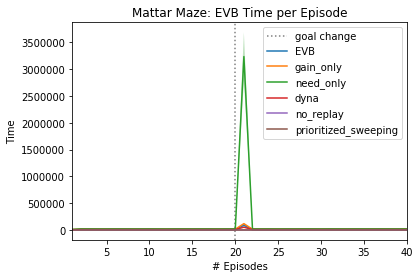

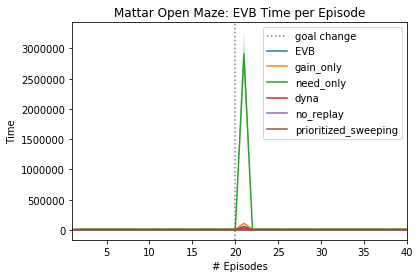

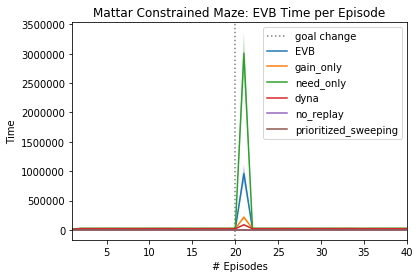

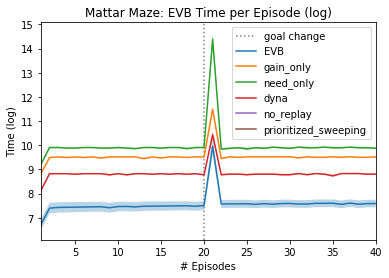

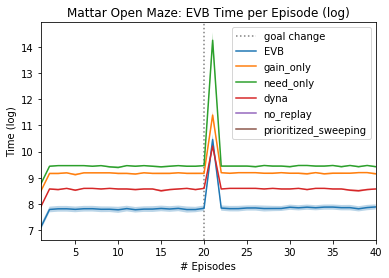

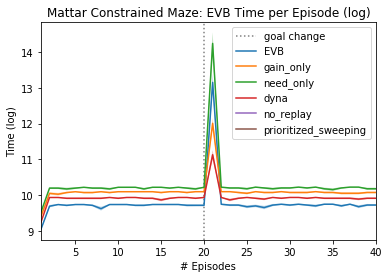

In [11]:
dependent_var = 'EVB_times'
y_label = 'Time'
title = 'EVB Time per Episode'
plot_log = True
crop_y = False
plot_mazes(maze_data_list, dependent_var, y_label, title, plot_log, crop_y)

## Gain time per episode

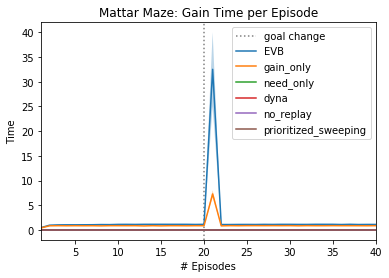

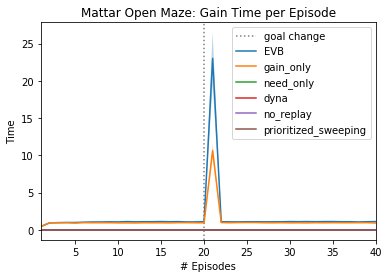

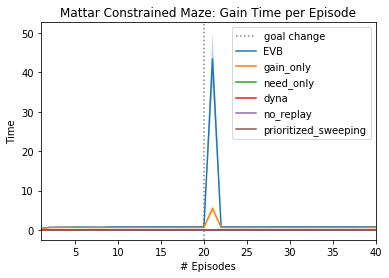

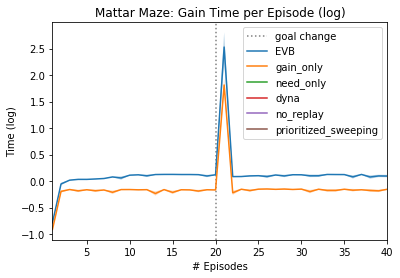

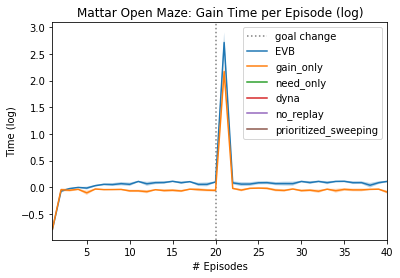

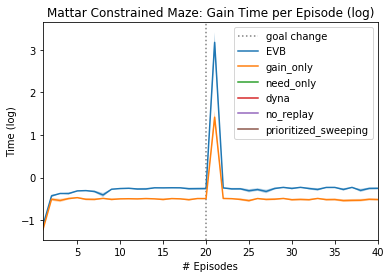

In [12]:
dependent_var = 'gain_times'
y_label = 'Time'
title = 'Gain Time per Episode'
plot_log = True
crop_y = False
plot_mazes(maze_data_list, dependent_var, y_label, title, plot_log, crop_y)

## Need time per episode

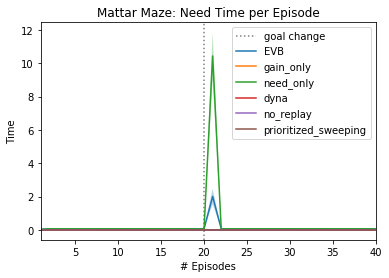

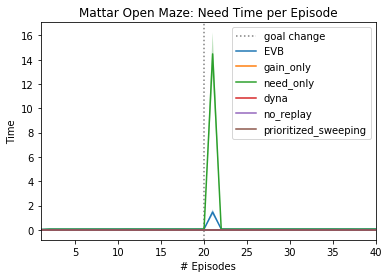

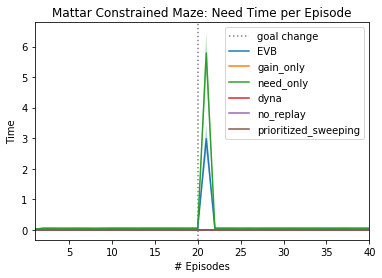

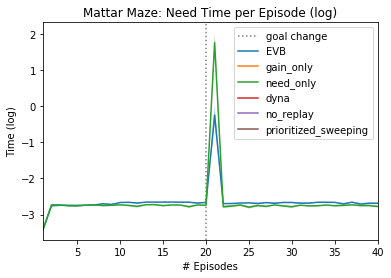

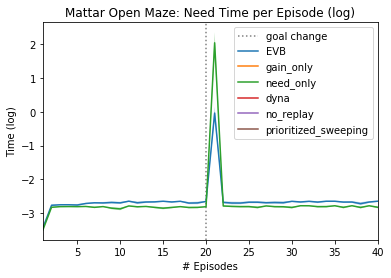

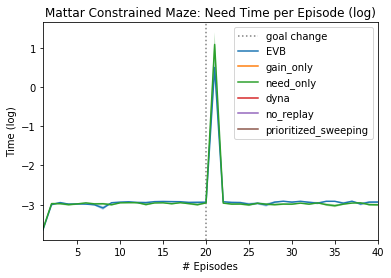

In [13]:
dependent_var = 'need_times'
y_label = 'Time'
title = 'Need Time per Episode'
plot_log = True
crop_y = False
plot_mazes(maze_data_list, dependent_var, y_label, title, plot_log, crop_y)